In [1]:
%matplotlib inline
import plotting_Boyle as plt_B
reload(plt_B)
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('ticks');
current_colors = sns.color_palette()
import sys 
sys.path.append('../code_general/')
from CRISPR_free_energy_landscape import unpack_parameters
import CRISPR_free_energy_landscape as FreeEnergy


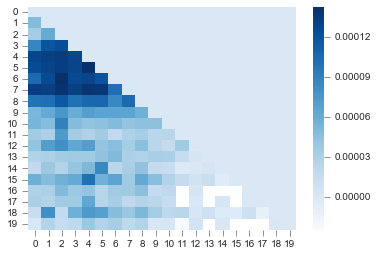

In [83]:
Path_to_boyle = '../Data_Boyle/KoenDataForMisha/BoyleData/'
data_file_off = 'DataOffRate.txt'
off_data = np.loadtxt(delimiter=',', fname=Path_to_boyle + data_file_off)


sns.heatmap(np.tril(off_data,k=-1), cmap='Blues')

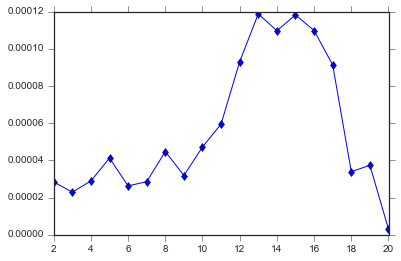

In [84]:
A = np.tril(off_data,k=-1)

avg_off_rate = [] 
for i in range(len(off_data)-1):
    avg = 0
    nan_count =0
    for j in range(0,i+1):
        if np.isnan(off_data[i,j])==False:
            avg += off_data[i,j]
        else:
            nan_count +=1
    avg /= ( len(range(0,i+1)) - nan_count)
    avg_off_rate.append(avg)

    
x = np.arange(20,1,-1)
plt.plot(x,(avg_off_rate), marker='d')


## Fit T (constant epsilon I)

In [76]:
model_id = 'constant_eps_I'
filename = '../data/26_7_2018/fit_26_7_2018_sim_T.txt'
Nparams = 24
parameters = plt_B.load_simm_anneal(filename, Nparams)


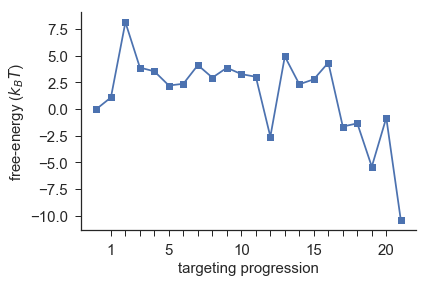

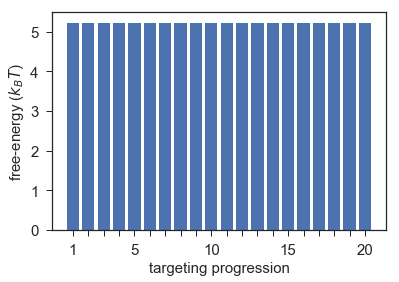

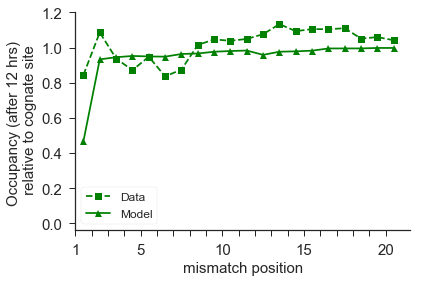

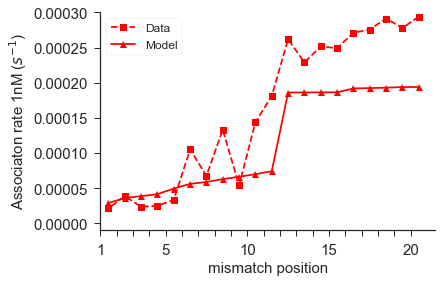

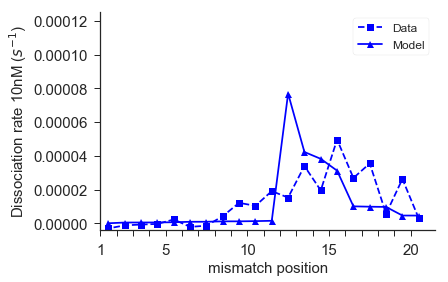

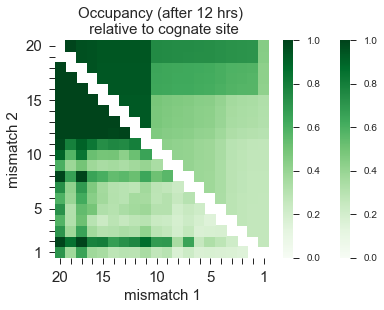

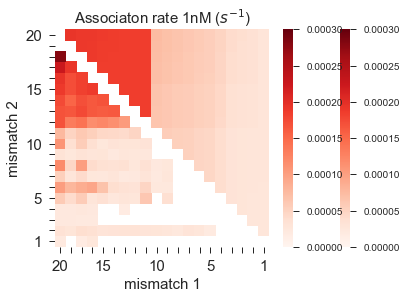

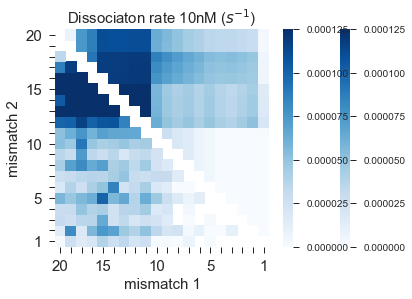

In [81]:
reload(plt_B)
Model_pbound, Model_on, Model_off = plt_B.calc_predictions(parameters,model_id)

plt_B.plot_landscape(parameters, model_id)
plt.figure()
plt_B.plot_mismatch_penalties(parameters, model_id)

plt.figure()
plt_B.plot_single_mismatches(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_single_mismatches(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_single_mismatches(Model_off ,kind='OffRate')

plt.figure()
plt_B.plot_heatmap(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_heatmap(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_heatmap(Model_off ,kind='OffRate')

## Fit Q (constant epsilon I)

In [82]:
model_id = 'constant_eps_I'
filename = '../data/26_7_2018/fit_26_7_2018_sim_Q.txt'
Nparams = 24
parameters = plt_B.load_simm_anneal(filename, Nparams)


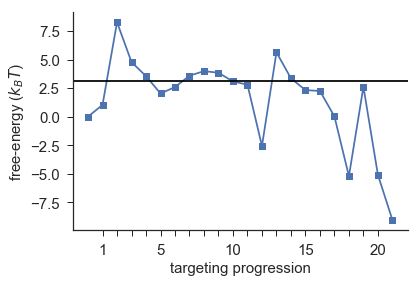

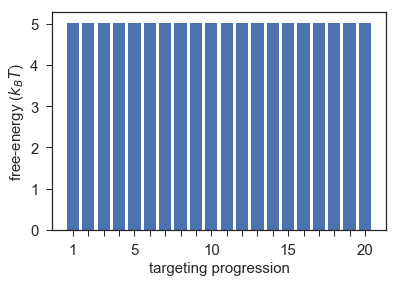

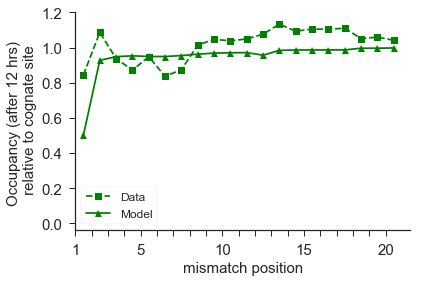

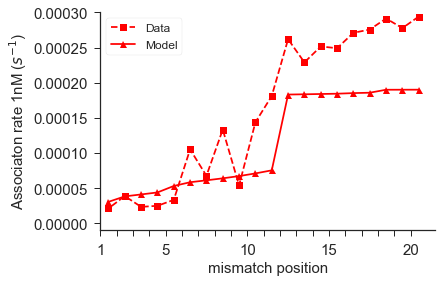

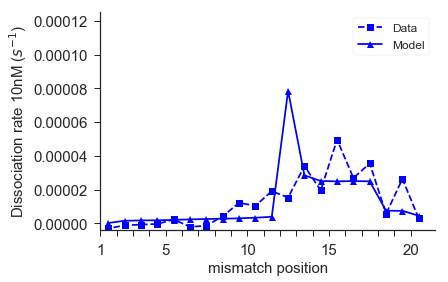

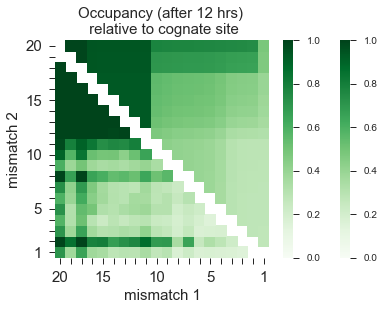

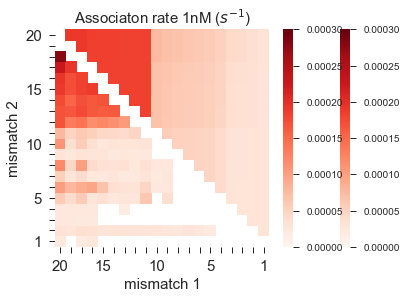

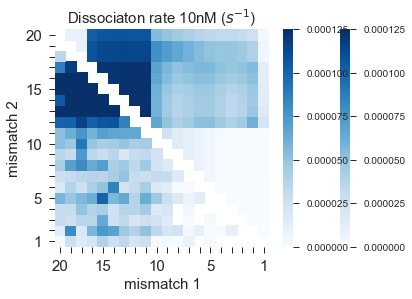

In [94]:
reload(plt_B)
Model_pbound, Model_on, Model_off = plt_B.calc_predictions(parameters,model_id)

landscape = plt_B.plot_landscape(parameters, model_id)
plt.axhline(3.076037024045001, color='black')
plt.figure()
plt_B.plot_mismatch_penalties(parameters, model_id)

plt.figure()
plt_B.plot_single_mismatches(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_single_mismatches(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_single_mismatches(Model_off ,kind='OffRate')

plt.figure()
plt_B.plot_heatmap(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_heatmap(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_heatmap(Model_off ,kind='OffRate')

## Trying Model with two slopes in the on-target landscape (constant E_I)

-5.9999999999999991

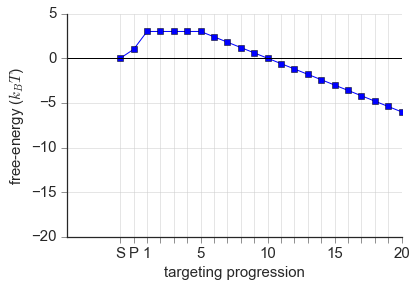

In [35]:
model_id='init_limit_lock_const_EpsI'

e_PAM = 1
ec_1 = -2
ec_first = 0.0
ec_second = 0.6
e_I = 4
x = 5 
k_PAM = 100.0
E_barr = -ec_1
k = 0.4

parameters = [e_PAM, ec_1, ec_first, ec_second, e_I, x, k_PAM, E_barr, k]

Energy_landscape = FreeEnergy.plot_landscape(parameters, model_id=model_id);
plt.ylim([-20, 5]);
Energy_landscape[-1]
plt.axhline(0, color='k')
Energy_landscape[-1]

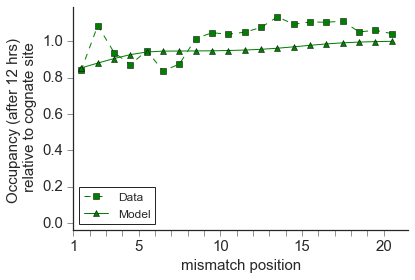

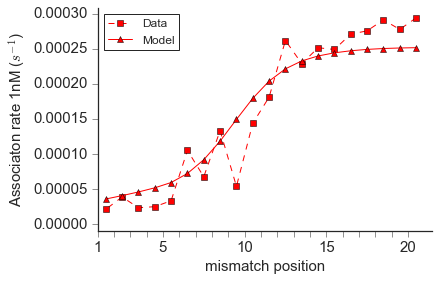

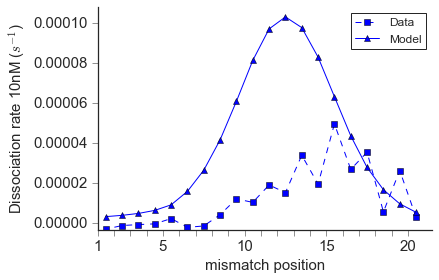

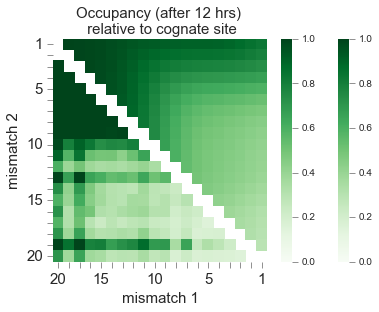

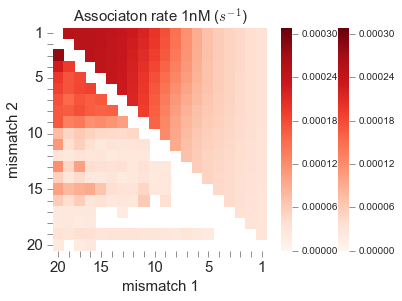

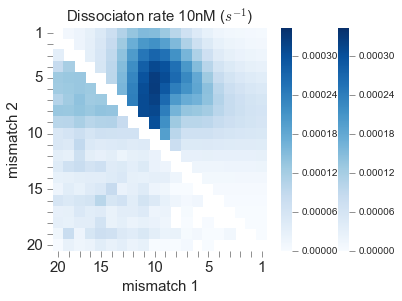

In [36]:
reload(plt_B)
Model_pbound, Model_on, Model_off = plt_B.calc_predictions(parameters,model_id)
plt.figure()
plt_B.plot_single_mismatches(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_single_mismatches(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_single_mismatches(Model_off ,kind='OffRate')

plt.figure()
plt_B.plot_heatmap(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_heatmap(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_heatmap(Model_off ,kind='OffRate')

In [52]:
np.log((1-np.exp(5))/(1-np.exp(0.8)))

4.7898569297394866

In [13]:
0.6*np.exp(-8.79)/(2*np.exp(-4.78)+np.exp(-1.5))

0.00038074341003309565

In [97]:
R=3
R_on = 6.5
F_tot = 5;
a=np.exp(-0.5*F_tot)
y = (0.5/R)+0.5*np.sqrt((1.0/R)**2-2*a*(1-1.0/R))
e_I = -np.log(y)
koff_Max_1 = np.exp(-F_tot)/(np.exp(-0.5*F_tot)+np.exp(-e_I))
E_on = -np.log(koff_Max_1)-np.log(6.5)
Stability_2MM = E_on + 2*e_I-F_tot-np.log(10)
Stability_2MM

-2.1342787969429002

In [95]:
-np.log((0.5/R)-0.5*np.sqrt((1.0/R)**2-2*a*(1-1.0/R)))

1.9223157236328765

-5.0

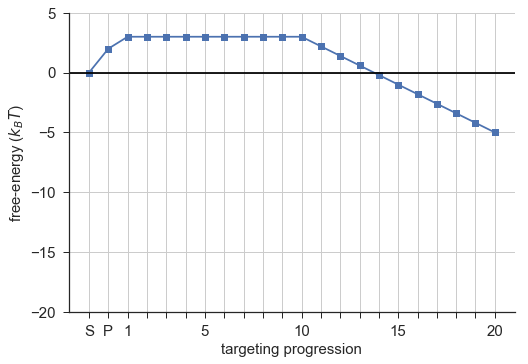

In [76]:
model_id='init_limit_lock_const_EpsI'

e_PAM = 2
ec_1 = -1
ec_first = 0.0
ec_second = 0.8
e_I = 1.5
x = 10
k_PAM = 100.0
E_barr = -ec_1
k = 0.6

parameters = [e_PAM, ec_1, ec_first, ec_second, e_I, x, k_PAM, E_barr, k]

Energy_landscape = FreeEnergy.plot_landscape(parameters, model_id=model_id);
plt.ylim([-20, 5]);
Energy_landscape[-1]
plt.axhline(0, color='k')
Energy_landscape[-1]

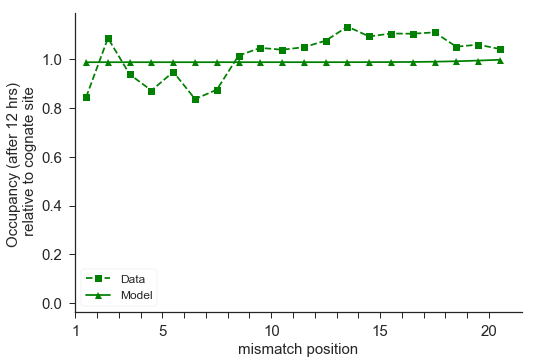

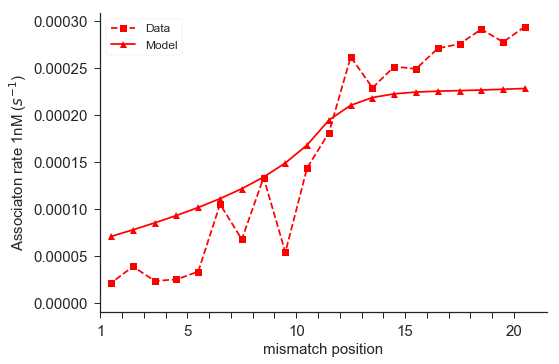

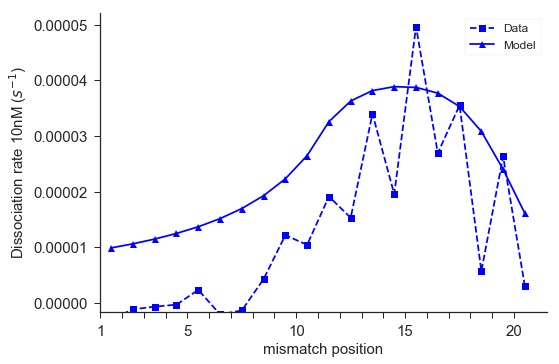

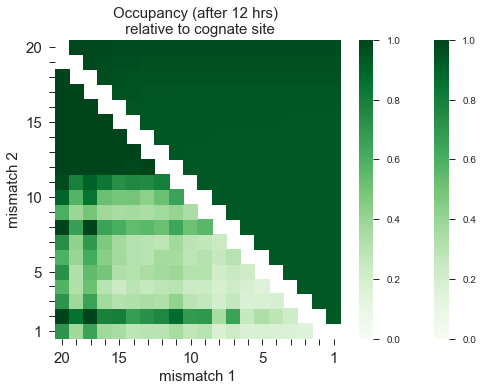

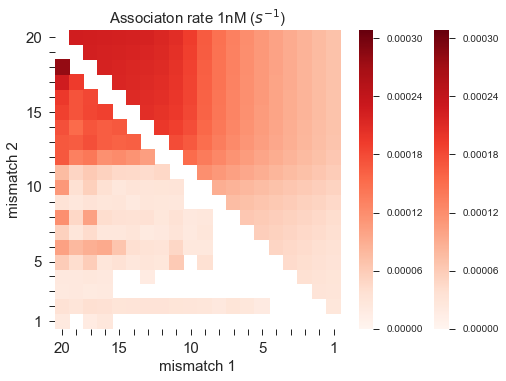

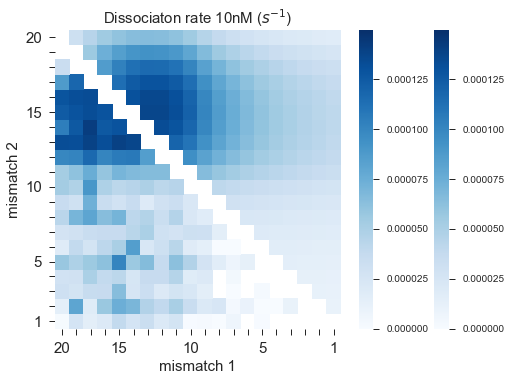

In [77]:
reload(plt_B)
Model_pbound, Model_on, Model_off = plt_B.calc_predictions(parameters,model_id)
plt.figure()
plt_B.plot_single_mismatches(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_single_mismatches(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_single_mismatches(Model_off ,kind='OffRate')

plt.figure()
plt_B.plot_heatmap(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_heatmap(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_heatmap(Model_off ,kind='OffRate')

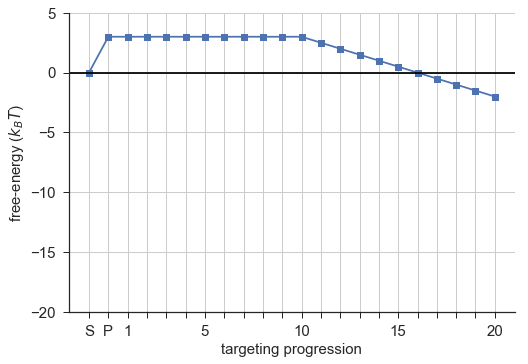

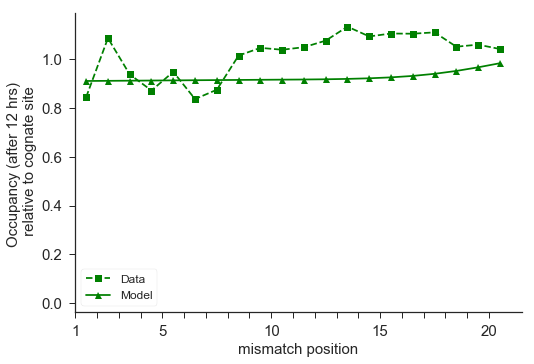

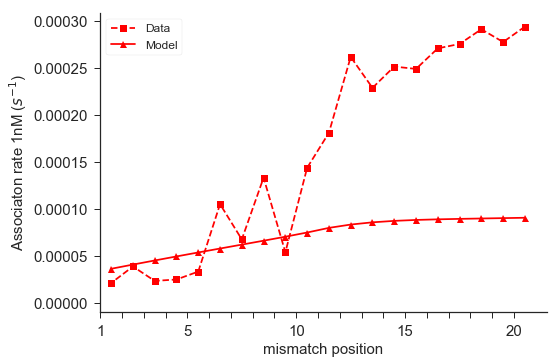

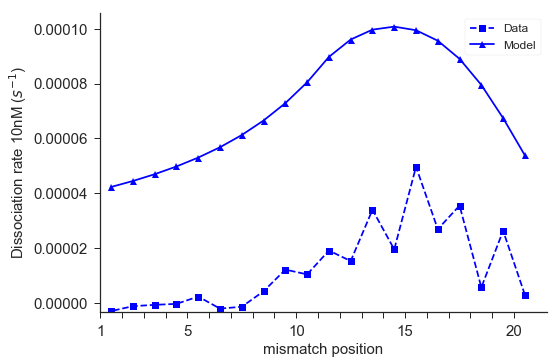

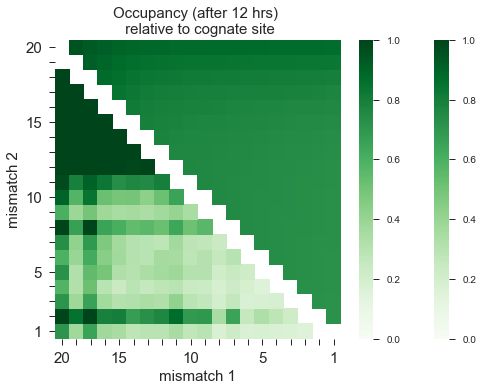

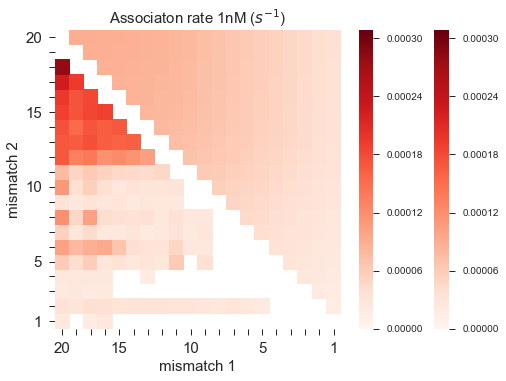

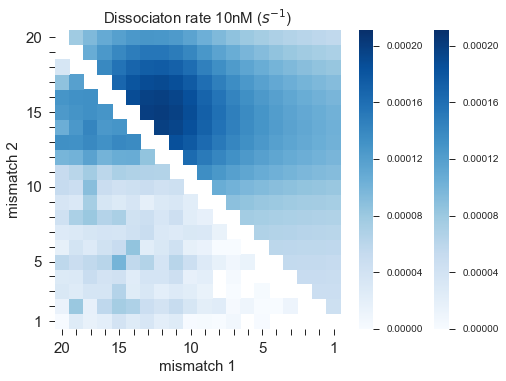

In [89]:
model_id='init_limit_lock_const_EpsI'

e_PAM = 3
ec_1 = -0
ec_first = 0.0
ec_second = 0.5
e_I = 1.1
x = 10
k_PAM = 100.0
E_barr = -ec_1
k = 0.2

parameters = [e_PAM, ec_1, ec_first, ec_second, e_I, x, k_PAM, E_barr, k]

Energy_landscape = FreeEnergy.plot_landscape(parameters, model_id=model_id);
plt.ylim([-20, 5]);
Energy_landscape[-1]
plt.axhline(0, color='k')
Energy_landscape[-1]


reload(plt_B)
Model_pbound, Model_on, Model_off = plt_B.calc_predictions(parameters,model_id)
plt.figure()
plt_B.plot_single_mismatches(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_single_mismatches(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_single_mismatches(Model_off ,kind='OffRate')

plt.figure()
plt_B.plot_heatmap(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_heatmap(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_heatmap(Model_off ,kind='OffRate')

## Trying Model with two drops in the on-target landscape (constant E_I)

-6.5

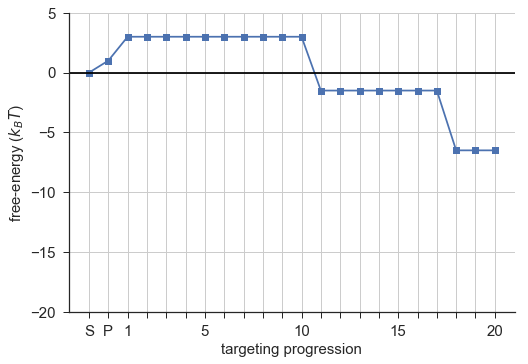

In [81]:
reload(plt_B)
reload(FreeEnergy)

model_id = 'init_limit_two_drops'

e_PAM = 1.0
ec_1 = -2.0
ec_first = 0.0
drop1 = 4.5
ec_second = 0.0
drop2 = 5.0
ec_third = 0.0
pos1 = 10
pos2 = 17
e_I = 4
k_PAM = 100.0
E_barr = -ec_1
k = 1.0

parameters = [e_PAM,ec_1,ec_first,drop1,ec_second,drop2,ec_third,pos1,pos2,e_I,k_PAM,E_barr,k]

Energy_landscape = FreeEnergy.plot_landscape(parameters, model_id=model_id);
plt.ylim([-20, 5]);
Energy_landscape[-1]
plt.axhline(0, color='k')
Energy_landscape[-1]

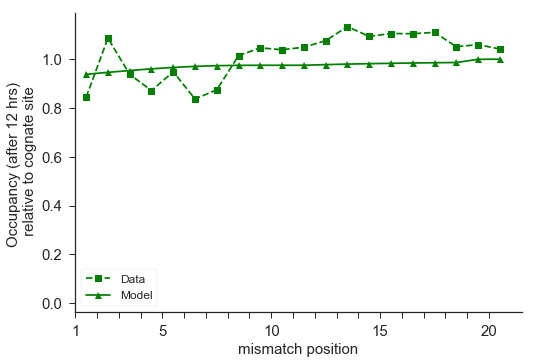

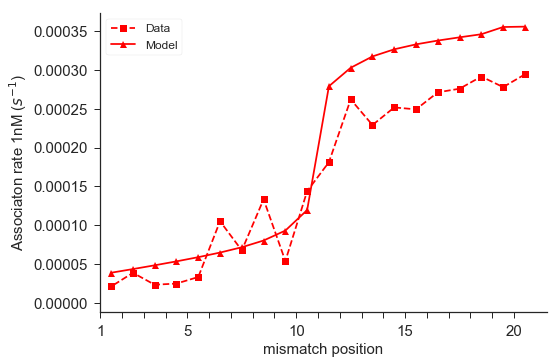

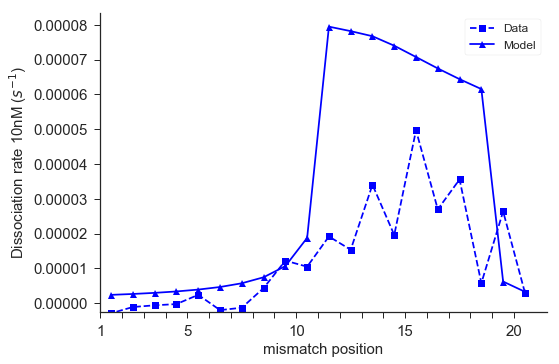

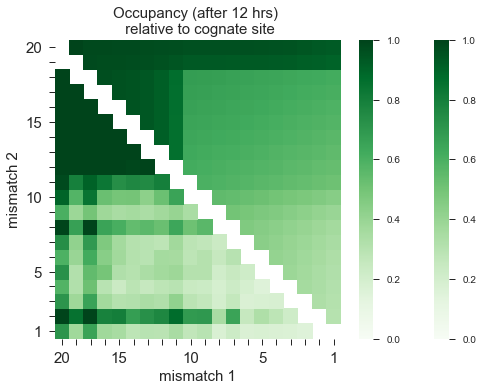

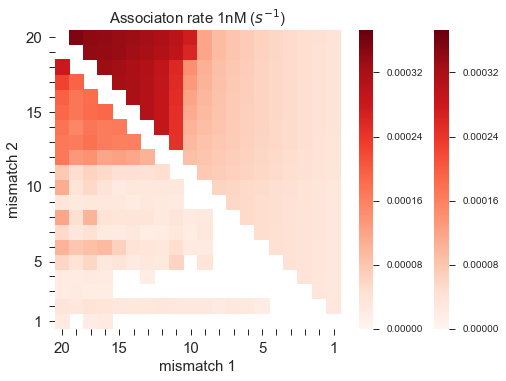

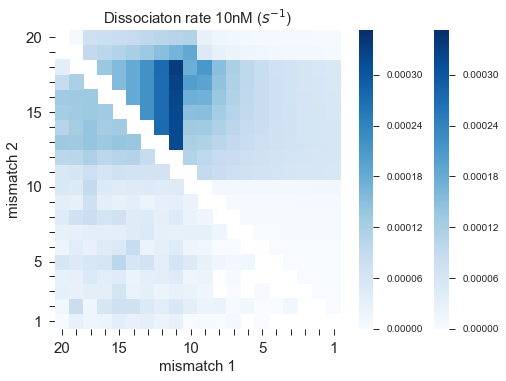

In [125]:
reload(plt_B)
Model_pbound, Model_on, Model_off = plt_B.calc_predictions(parameters,model_id)
plt.figure()
plt_B.plot_single_mismatches(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_single_mismatches(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_single_mismatches(Model_off ,kind='OffRate')

plt.figure()
plt_B.plot_heatmap(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_heatmap(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_heatmap(Model_off ,kind='OffRate')

## Important

-6.9500000000000002

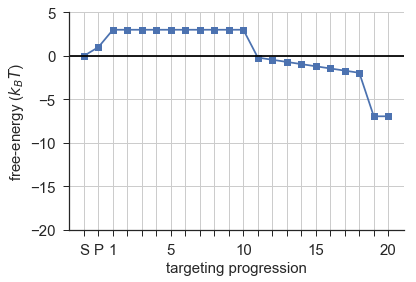

In [219]:
reload(plt_B)
reload(FreeEnergy)

model_id = 'init_limit_two_drops'

e_PAM = 1.0
ec_1 = -2.0
ec_first = 0.0
drop1 = 3.2
ec_second = 0.25
drop2 = 5
ec_third = 0.0
pos1 = 10
pos2 = 18
e_I = 4
k_PAM = 100.0
E_barr = -ec_1
k = 0.6

parameters = [e_PAM,ec_1,ec_first,drop1,ec_second,drop2,ec_third,pos1,pos2,e_I,k_PAM,E_barr,k]

Energy_landscape = FreeEnergy.plot_landscape(parameters, model_id=model_id);
plt.ylim([-20, 5]);
Energy_landscape[-1]
plt.axhline(0, color='k')
Energy_landscape[-1]

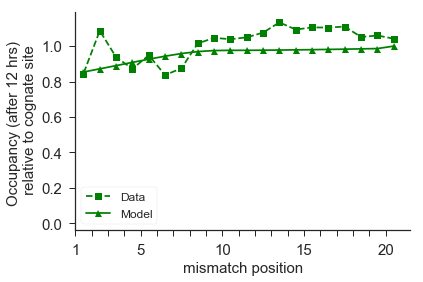

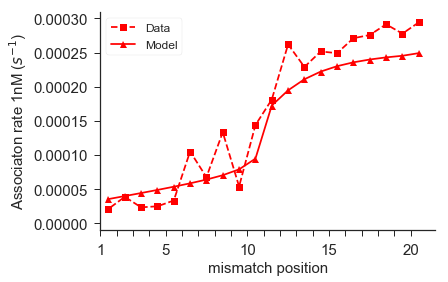

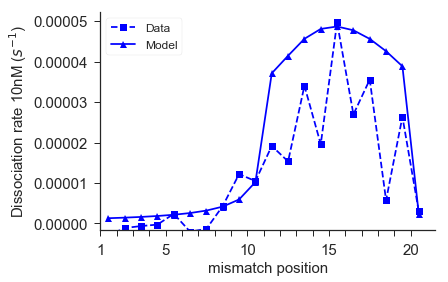

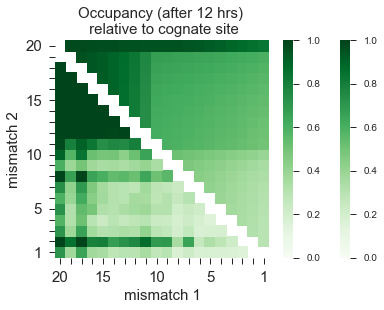

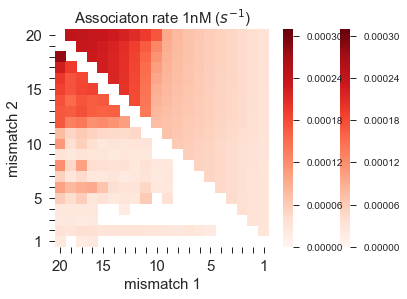

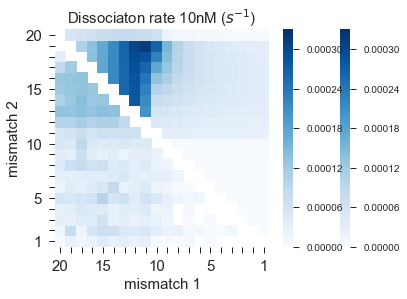

In [220]:
reload(plt_B)
Model_pbound, Model_on, Model_off = plt_B.calc_predictions(parameters,model_id)
plt.figure()
plt_B.plot_single_mismatches(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_single_mismatches(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_single_mismatches(Model_off ,kind='OffRate')

plt.figure()
plt_B.plot_heatmap(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_heatmap(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_heatmap(Model_off ,kind='OffRate')

## Important

-6.9500000000000002

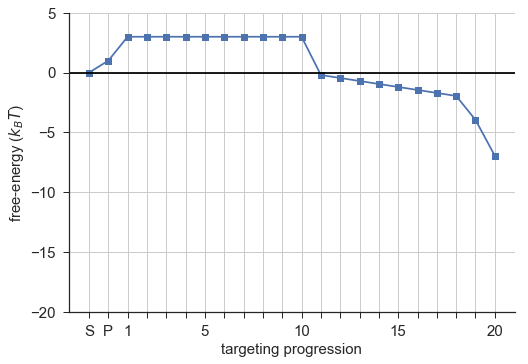

In [203]:
reload(plt_B)
reload(FreeEnergy)

model_id = 'init_limit_two_drops'

e_PAM = 1.0
ec_1 = -2.0
ec_first = 0.0
drop1 = 3.2
ec_second = 0.25
drop2 = 2
ec_third = 3
pos1 = 10
pos2 = 18
e_I = 4
k_PAM = 100.0
E_barr = -ec_1
k = 0.6

parameters = [e_PAM,ec_1,ec_first,drop1,ec_second,drop2,ec_third,pos1,pos2,e_I,k_PAM,E_barr,k]

Energy_landscape = FreeEnergy.plot_landscape(parameters, model_id=model_id);
plt.ylim([-20, 5]);
Energy_landscape[-1]
plt.axhline(0, color='k')
Energy_landscape[-1]

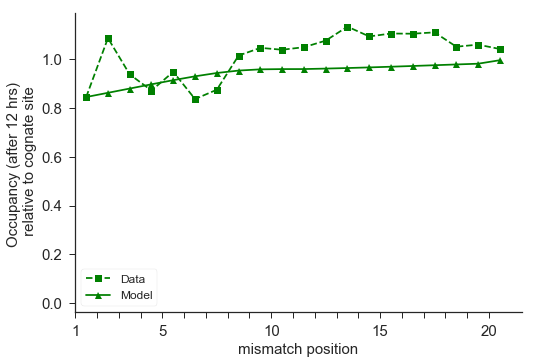

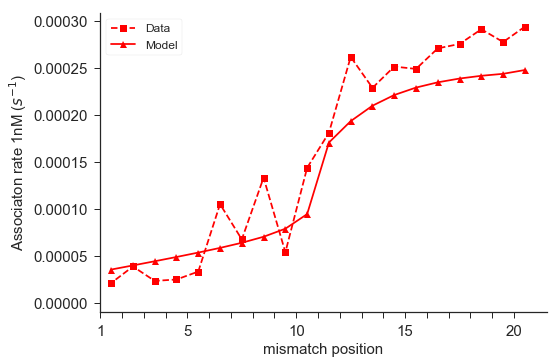

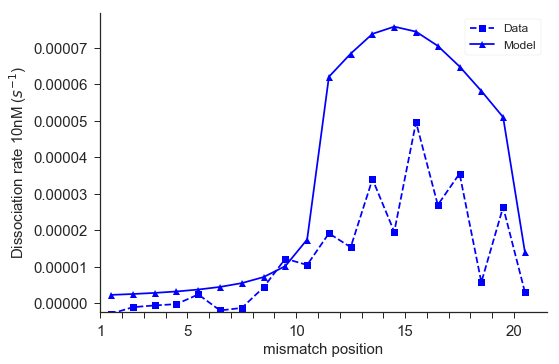

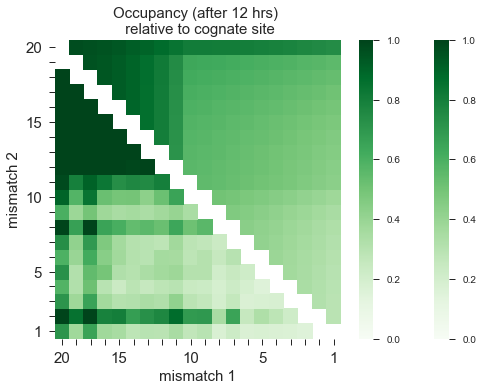

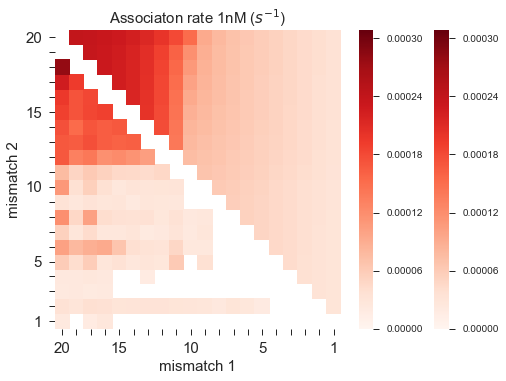

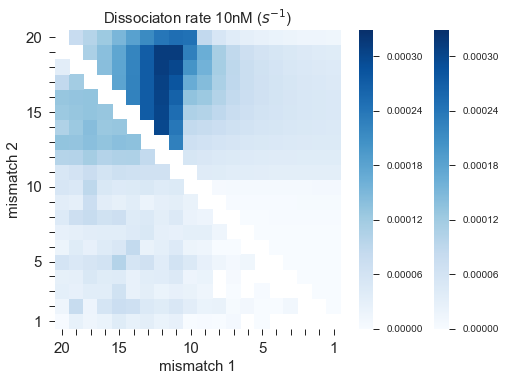

In [202]:
reload(plt_B)
Model_pbound, Model_on, Model_off = plt_B.calc_predictions(parameters,model_id)
plt.figure()
plt_B.plot_single_mismatches(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_single_mismatches(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_single_mismatches(Model_off ,kind='OffRate')

plt.figure()
plt_B.plot_heatmap(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_heatmap(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_heatmap(Model_off ,kind='OffRate')

-6.5000000000000009

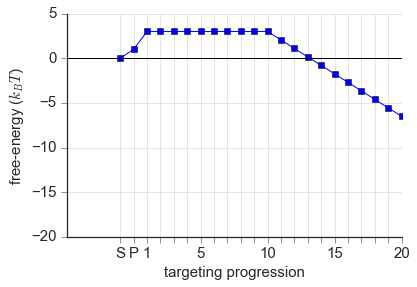

In [119]:
reload(plt_B)
reload(FreeEnergy)

model_id = 'init_limit_two_drops'

e_PAM = 1.0
ec_1 = -2.0
ec_first = 0.0
drop1 = ec_second
ec_second = 0.95
drop2 = ec_second
ec_third = ec_second
pos1 = 9
pos2 = 18
e_I = 4.2
k_PAM = 100.0
E_barr = -ec_1
k = 0.6

parameters = [e_PAM,ec_1,ec_first,drop1,ec_second,drop2,ec_third,pos1,pos2,e_I,k_PAM,E_barr,k]

Energy_landscape = FreeEnergy.plot_landscape(parameters, model_id=model_id);
plt.ylim([-20, 5]);
Energy_landscape[-1]
plt.axhline(0, color='k')
Energy_landscape[-1]

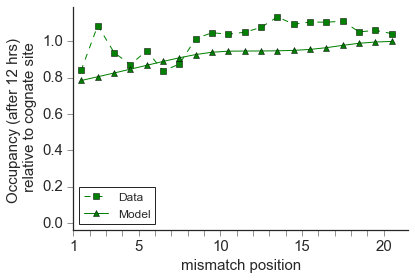

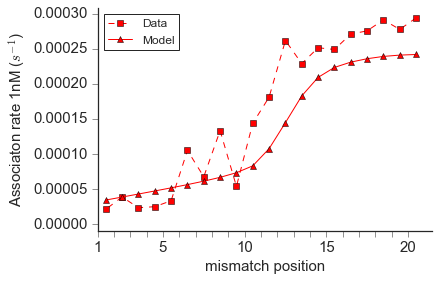

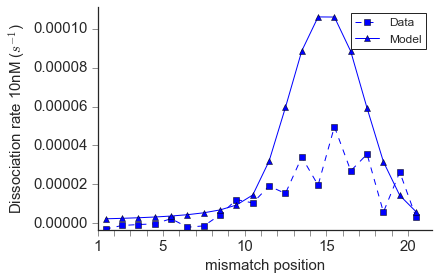

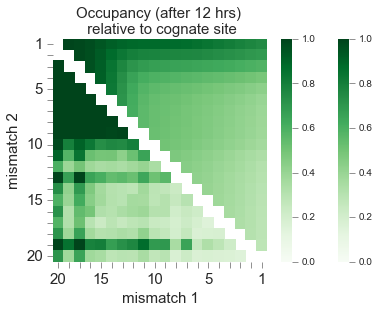

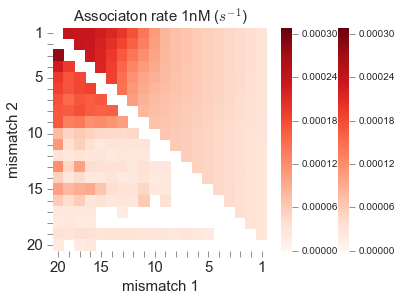

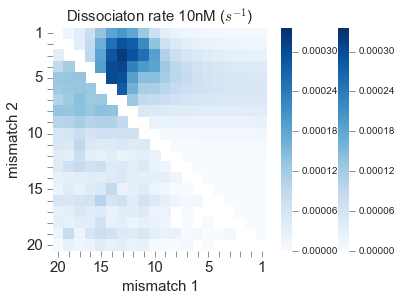

In [120]:
reload(plt_B)
Model_pbound, Model_on, Model_off = plt_B.calc_predictions(parameters,model_id)
plt.figure()
plt_B.plot_single_mismatches(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_single_mismatches(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_single_mismatches(Model_off ,kind='OffRate')

plt.figure()
plt_B.plot_heatmap(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_heatmap(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_heatmap(Model_off ,kind='OffRate')

-3.0

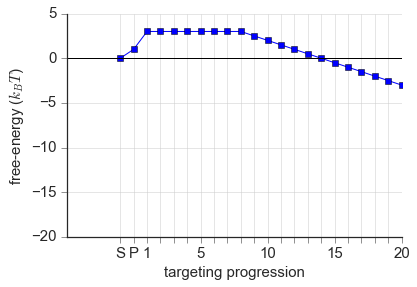

In [123]:
reload(plt_B)
reload(FreeEnergy)

model_id = 'init_limit_two_drops'

e_PAM = 1.0
ec_1 = -2.0
ec_first = 0.0
drop1 = ec_second
ec_second = 0.5
drop2 = ec_second
ec_third = ec_second
pos1 = 8
pos2 = 18
e_I = 2
k_PAM = 100.0
E_barr = -ec_1
k = 0.6

parameters = [e_PAM,ec_1,ec_first,drop1,ec_second,drop2,ec_third,pos1,pos2,e_I,k_PAM,E_barr,k]

Energy_landscape = FreeEnergy.plot_landscape(parameters, model_id=model_id);
plt.ylim([-20, 5]);
Energy_landscape[-1]
plt.axhline(0, color='k')
Energy_landscape[-1]

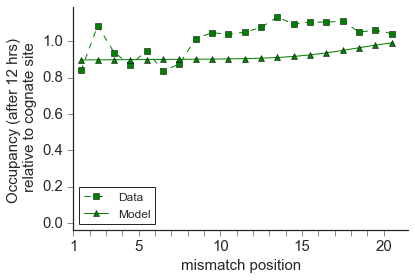

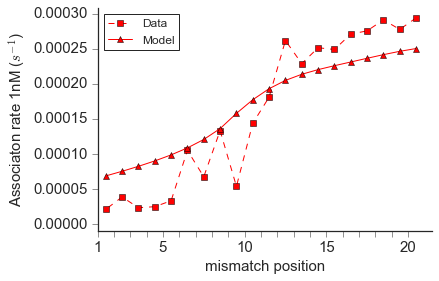

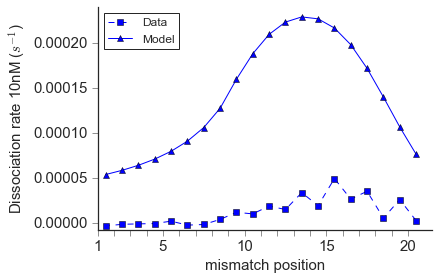

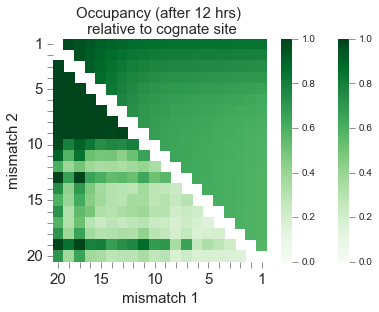

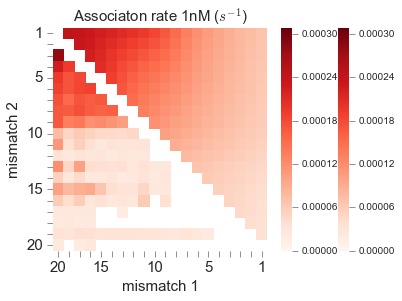

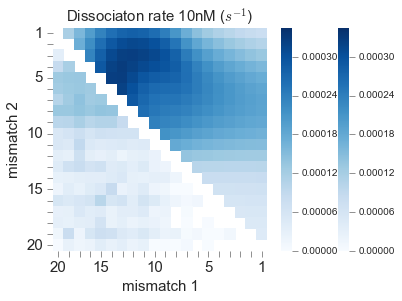

In [124]:
reload(plt_B)
Model_pbound, Model_on, Model_off = plt_B.calc_predictions(parameters,model_id)
plt.figure()
plt_B.plot_single_mismatches(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_single_mismatches(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_single_mismatches(Model_off ,kind='OffRate')

plt.figure()
plt_B.plot_heatmap(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_heatmap(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_heatmap(Model_off ,kind='OffRate')